<h1><center>Abhishek Thakur Book Concept<center></h2>

###  Chapter - Feature Enginnering/Features_Transform

#### Topic-1 KNN imputer
* NOTE: available in sckit-learn '0.23.2' version.

* Theory and some Key aspects of this method:
    * This is a fancy way of handling the missing values.
    * Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.
 
    * Advantage over other imputer's:
    Some methods such as droping data points if it has a missing value or replacing the missing values with mean, median or mode values. However, these methods can waste valuable data or reduce the variability of your dataset.
     KNN Imputer maintains the value and variability of your datasets and yet it is more precise
     
     * Limitations:
         * One thing to note here is that the KNN Imputer does not recognize text data values Becoz it works on some distance metric like **Euclidean** 
         * So we have to convert text data into numeric one then apply KNNImputer. 
    
    
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [1]:
import numpy as np
from sklearn import impute 

In [2]:
#creating ndarry with 10 rows and 6 columns
#values are rangin in b/w 10 to 20
X = np.random.randint(10, 20, (10,6))
X = X.astype(float)
X

array([[12., 17., 17., 18., 19., 11.],
       [19., 12., 10., 17., 14., 16.],
       [11., 19., 18., 18., 12., 18.],
       [10., 18., 12., 15., 13., 19.],
       [13., 15., 18., 10., 19., 12.],
       [14., 14., 14., 18., 19., 18.],
       [14., 11., 11., 19., 10., 14.],
       [14., 18., 12., 18., 10., 15.],
       [10., 17., 14., 15., 11., 15.],
       [10., 10., 14., 12., 13., 19.]])

In [3]:
#randomly assigninging NaN values to 10 numbers into above matrics
#NOTE : choice function only works for 1-D array so that is why i
#flat the above array using np.ravel()
#"replace=False" so that nan value assignment can happen without replacemet

X.ravel()[np.random.choice(X.size, 10, replace = False)] = np.nan

In [4]:
#data with NaN/null values
X

array([[12., 17., 17., nan, 19., 11.],
       [19., 12., nan, 17., 14., 16.],
       [11., 19., nan, 18., 12., 18.],
       [10., 18., nan, 15., 13., 19.],
       [13., nan, 18., 10., 19., 12.],
       [14., 14., 14., 18., 19., 18.],
       [14., nan, nan, 19., 10., 14.],
       [14., 18., 12., 18., 10., 15.],
       [10., 17., 14., 15., 11., 15.],
       [nan, 10., nan, 12., 13., nan]])

In [5]:
#applying knn_imputer with 2 neighbours(not be best but i just use it 
#for demonstration purpose)
knn_imputer = impute.KNNImputer(n_neighbors = 2)
knn_imputer.fit_transform(X)

array([[12. , 17. , 17. , 14. , 19. , 11. ],
       [19. , 12. , 13. , 17. , 14. , 16. ],
       [11. , 19. , 13. , 18. , 12. , 18. ],
       [10. , 18. , 13. , 15. , 13. , 19. ],
       [13. , 13.5, 18. , 10. , 19. , 12. ],
       [14. , 14. , 14. , 18. , 19. , 18. ],
       [14. , 18.5, 13. , 19. , 10. , 14. ],
       [14. , 18. , 12. , 18. , 10. , 15. ],
       [10. , 17. , 14. , 15. , 11. , 15. ],
       [16. , 10. , 16. , 12. , 13. , 14. ]])

NOTE : *Another way of imputing missing values using train a regression model that try to predict the missing value using a column based on others columns, So we try to train our model using non missing values and predict targate value which have missing values, It is more robust.(Model Based imputaion)*

#### Topic-2 Feature Transformation Intution

In the industry sometimes it might also happen, when we gather some dataset by some stakeholders or may be by own or with some other means we dont have enough features by which our bussiness problem can solve in that case what we've to do, one solution is that we generate some new features from existing one this technique is called as **features Transformation**.

Let's take very simple example of XOR popular data set.

![XOR dataset](xor.png)

if above dataset i want to build my classification with linear models such as Logistic Regression(fundamental way not any extension) then first i have to do feature transformation i.e create new features from existing one in such a way that these classes becomes linearly saperable(very good intuitive idea)
So this is a simple intutive idea why we do FT's.

In [ ]:
* Under Features Transformation generally following :
    * Handling Missing Values
    * Feature Normalization and scalling
    * creating new features from existing one

Simple way to create many features just create **polynomial features** for e.g. Let say we have two features namely A,B. From A, B we could end up with new features using FT's A, B, AB, A^2, B^2 features.

In [6]:
import pandas as pd

In [7]:
#creating dataframe with 100 rows and two columns
df = pd.DataFrame(np.random.rand(100, 2),
                  columns=[f"F_{i}" for i in range(1, 3)]
                )
df.head()

,F_1,F_2
0,0.662536,0.279678
1,0.758826,0.590847
2,0.511054,0.237119
3,0.495203,0.278423
4,0.822360,0.475099


* Create two-degree polynomial using ***PolynomialFeatures*** from sklearn.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2,
                        interaction_only = False,
                        include_bias = False
)

#fit to the features
pf.fit(df)

#create polynomial features
poly_features = pf.transform(df)


#creating dataframe with above features
num_features = poly_features.shape[1]

df_transformed = pd.DataFrame(poly_features,
                             columns = [f"F_{i}" for i in range(1, num_features + 1)]
)

df_transformed.head()

,F_1,F_2,F_3,F_4,F_5
0,0.662536,0.279678,0.438953,0.185297,0.078220
1,0.758826,0.590847,0.575817,0.448350,0.349100
2,0.511054,0.237119,0.261176,0.121181,0.056226
3,0.495203,0.278423,0.245226,0.137876,0.077520
4,0.822360,0.475099,0.676276,0.390702,0.225719


if we want to create 3 degree polynomial then we'd end up with nine total features.
like A^2B, AB^2, A^3, B^3 also added in above transformation.

In [9]:
df_2 = df.copy()

#creating object for 3rd dgree polynomial
pf_3 = PolynomialFeatures(degree = 3,
                        interaction_only = False,
                        include_bias = False
)

#fitting data 
pf_3.fit(df_2)
poly_degree3 = pf_3.transform(df_2)

#converting into df's.
new_df = pd.DataFrame(poly_degree3, 
            columns = [f"F_{i}" for i in range(1, poly_degree3.shape[1]+1)]
)
new_df.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9
0,0.662536,0.279678,0.438953,0.185297,0.078220,0.290822,0.122766,0.051823,0.021876
1,0.758826,0.590847,0.575817,0.448350,0.349100,0.436945,0.340220,0.264907,0.206265
2,0.511054,0.237119,0.261176,0.121181,0.056226,0.133475,0.061930,0.028734,0.013332
3,0.495203,0.278423,0.245226,0.137876,0.077520,0.121436,0.068277,0.038388,0.021583
4,0.822360,0.475099,0.676276,0.390702,0.225719,0.556142,0.321298,0.185622,0.107239


NOTE: *What i observe, feature enginnering/feat_trans is something we can done in best possible way when we have some knowledge about domain of the problem and as well as we know some basic transformation like log, exp and many more.But we also take care while doing transformation such that data set meaning doesn't change.*

#### Binning

* Another feature transformation like converts continuous variables into categories. It knows as **binning**. 

* Converting numbers into the categories using ***binning***(It is Nothing just creating the bins like as histogram we do)

In [10]:
#with 10 bins using pandas cut methods.
df['F_bin_10'] = pd.cut(df['F_1'], bins = 10, labels = False)

#with 100 bins
df['F_bin_100'] = pd.cut(df['F_1'], bins = 100, labels = False)

In [11]:
df.head()

,F_1,F_2,F_bin_10,F_bin_100
0,0.662536,0.279678,6,67
1,0.758826,0.590847,7,77
2,0.511054,0.237119,5,51
3,0.495203,0.278423,5,50
4,0.822360,0.475099,8,83


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([13., 11.,  6.,  8.,  6., 14.,  9., 14.,  9., 10.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

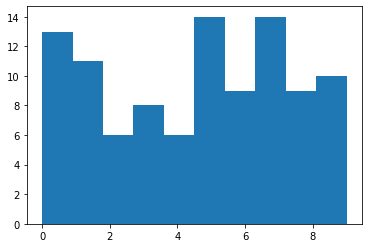

In [13]:
plt.hist(df.F_bin_10, histtype = 'barstacked')

In [14]:
#creating one more feature F_3 
df.loc[: , 'F_3'] = np.random.randint(0,10000, 100)

In [15]:
df.head()

,F_1,F_2,F_bin_10,F_bin_100,F_3
0,0.662536,0.279678,6,67,8968
1,0.758826,0.590847,7,77,1769
2,0.511054,0.237119,5,51,4130
3,0.495203,0.278423,5,50,6773
4,0.822360,0.475099,8,83,4360


(array([12., 12., 12., 13.,  7.,  7., 12.,  8.,  7., 10.]),
 array([  35. , 1019.3, 2003.6, 2987.9, 3972.2, 4956.5, 5940.8, 6925.1,
        7909.4, 8893.7, 9878. ]),
 <a list of 10 Patch objects>)

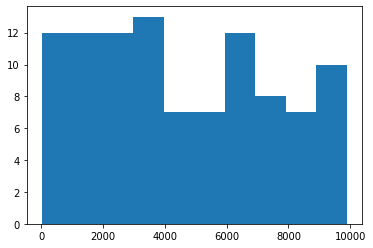

In [16]:
plt.hist(df.F_3, histtype = 'barstacked')

After logarthmatic transformation log(1+x) on F_3 features.

In [17]:
df['Log_F_3'] = df.F_3.apply(lambda x: np.log(1 + x))
df.head()

,F_1,F_2,F_bin_10,F_bin_100,F_3,Log_F_3
0,0.662536,0.279678,6,67,8968,9.101529
1,0.758826,0.590847,7,77,1769,7.478735
2,0.511054,0.237119,5,51,4130,8.326275
3,0.495203,0.278423,5,50,6773,8.820847
4,0.822360,0.475099,8,83,4360,8.380457


In [18]:
#try to check variance before transformation
print(df.F_3.var())

#after transformation

print(df.Log_F_3.var())


8594176.923131315
0.9868717812156007


Above we can seen their is a drastic change in variance.

(array([ 1.,  0.,  0.,  2.,  3.,  6.,  9., 20., 19., 40.]),
 array([3.58351894, 4.1449837 , 4.70644846, 5.26791323, 5.82937799,
        6.39084275, 6.95230752, 7.51377228, 8.07523704, 8.63670181,
        9.19816657]),
 <a list of 10 Patch objects>)

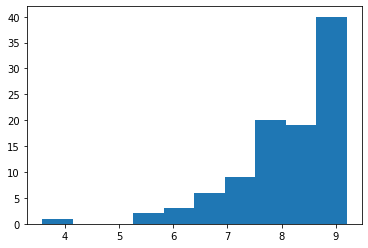

In [19]:
#look at the distribution of Log_F_3
plt.hist(df.Log_F_3, histtype = 'barstacked')

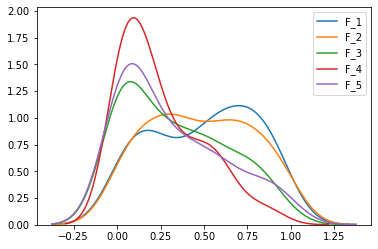

In [20]:
# get first five features distribution
for i in new_df.columns[0:5]:
    sns.kdeplot(new_df[i])

* Moving window to time series data

Lets way we are dealing with **date and time data** 
Let's we have datetime column, then we can create follwing features like below :
    - year
    - Month
    - hour
    - weekend
    - week of year
    - And many more.

In [21]:
#Let's create dummy dataframe
features = {
    'Date' : pd.date_range('2020-01-06', '2020-01-10', freq = '10H'),
    'customers_id': np.random.randint(1000, 1004, 10),
    'cat_1' : np.random.randint(2, 5, 10),
    'cat_2' : np.random.randint(0, 3, 10),
    'cat_3' : np.random.randint(4, 7, 10),
    'num1'  : np.random.randn(10)
}

dummy_df = pd.DataFrame(features)
dummy_df.head()

,Date,customers_id,cat_1,cat_2,cat_3,num1
0,2020-01-06 00:00:00,1001,4,1,6,0.134127
1,2020-01-06 10:00:00,1001,3,0,5,-1.055308
2,2020-01-06 20:00:00,1002,2,1,6,-1.726648
3,2020-01-07 06:00:00,1001,3,2,4,0.301749
4,2020-01-07 16:00:00,1001,2,2,6,0.020451


In [22]:
dummy_df.dtypes

Date            datetime64[ns]
customers_id             int64
cat_1                    int64
cat_2                    int64
cat_3                    int64
num1                   float64
dtype: object

In [23]:
dummy_df.shape

(10, 6)

In [24]:
#Let's check unique categories in each columns
for col in dummy_df.columns[1:5]:
    print(pd.unique(dummy_df[col]))

[1001 1002 1000]
[4 3 2]
[1 0 2]
[6 5 4]


In [25]:
##Let's generate more features from date_time

def gen_features(df):
    
    #create some bunch of features
    df.loc[:, 'year'] = df.Date.dt.year
    df.loc[:, 'month'] = df.Date.dt.month
    df.loc[:, 'dayofweek'] = df.Date.dt.dayofweek
    
    #create aggregate dictionary
    
    aggs = {}
    
    aggs['month'] = ['nunique', 'mean']
    aggs['num1'] = ['sum', 'mean', 'max', 'min']
    aggs['customers_id' ] = ['nunique']
    
    #apply groupby according to customers_id and then apply aggregation on top of that
    
    agg_df = df.groupby('customers_id').agg(aggs)
    agg_df = agg_df.reset_index()
    
    return agg_df

In [26]:
#i just pass the df.copy becoz my actual data wouldn't change
agg_df = gen_features(dummy_df.copy())
agg_df

customers_id   month           num1                                \
               nunique mean       sum      mean       max       min   
0         1000       1    1  0.100803  0.100803  0.100803  0.100803   
1         1001       1    1 -0.877910 -0.125416  0.902317 -1.419625   
2         1002       1    1 -0.763040 -0.381520  0.963608 -1.726648   

  customers_id  
       nunique  
0            1  
1            1  
2            1

We can also join this DF's with our original data frame if we want to do some prediction. 